> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The "TMDb Movie Data" dataset contains detailed information on 10,000 movies collected from The Movie Database (TMDb). This dataset is intended for analysis to better understand the factors that contribute to movie success and to explore trends in the film industry over time.  
The dataset includes the following columns:  
`id`: Unique identifier assigned to each movie in the database.  
`imdb_id`: Unique identifier for the movie on IMDb.  
`popularity`: A score indicating the popularity of the movie.  
`budget`: The production budget of the movie.  
`revenue`: The total revenue earned by the movie upon release.  
`original_title`: The original title of the movie.  
`cast`: A list of main actors in the movie.  
`homepage`: Link to the official website of the movie (if available).  
`director`: Name of the movie’s director.  
`tagline`: The movie’s tagline or slogan.  
`keywords`: Keywords associated with the movie’s content.  
`overview`: A brief synopsis of the movie.  
`runtime`: The length of the movie in minutes.  
`genres`: Genres associated with the movie, such as Action, Comedy, or Horror. Multiple genres are separated by a "|" character.  
`production_companies`: The production companies involved in making the movie.  
`release_date`: The official release date of the movie.  
`vote_count`: The total number of votes received by the movie.  
`vote_average`: The average vote rating of the movie, reflecting audience favorability.  
`release_year`: The release year of the movie.  
`budget_adj`: The movie’s budget, adjusted for inflation to 2010 dollars.  
`revenue_adj`: The movie’s revenue, adjusted for inflation to 2010 dollars.  


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [47]:
# Import the necessary libraries for data analysis and visualization.
import pandas as pd
import matplotlib.pyplot as plt

# Ensures that all plots will be displayed inline within the notebook.
%matplotlib inline
# print(plt.style.available)

# This line gives a cleaner look to the plots
plt.style.use('ggplot')

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations initially. This does not have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, trim the excess and organize your steps so that you have a flowing, cohesive report.

In [48]:
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.

# Load the dataset and display the first few rows
df = pd.read_csv('tmdb-movies.csv')
df.head()

# Check the size of the dataframe
print("Dataset shape:", df.shape)

# Inspect the data types of each column
df.info()

# Check for any missing values in each column
missing_values = df.isnull().sum()
print("\nMissing values per column:\n", missing_values)

# View basic statistics
df.describe()

# Look for duplicate rows to see if there are any redundant entries
duplicate_rows = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_rows)

# Check unique values in critical columns
print("\nUnique genres:\n", df['genres'].unique())
print("\nUnique release years:\n", df['release_year'].unique())


Dataset shape: (10866, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   objec


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [49]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)
print("Number of rows after removing duplicates:", df.shape[0])

# Drop irrelevant columns
df.drop(columns=['homepage', 'tagline'], inplace=True)
print("\nColumns after dropping irrelevant ones:", df.columns)

# Handle missing values for 'runtime' by replacing them with the median
df['runtime'] = df['runtime'].fillna(df['runtime'].median())

# Drop rows with missing values in essential columns
df.dropna(subset=['director', 'genres'], inplace=True)

# Convert 'release_date' to datetime format with specified format
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d', errors='coerce')

# Drop rows with NaT in 'release_date'
df.dropna(subset=['release_date'], inplace=True)

# Confirm there are no more missing values in critical columns
print("\nMissing values after cleaning:\n", df.isnull().sum())

# Reset index
df.reset_index(drop=True, inplace=True)

# Display final structure and a few rows to verify the cleaning steps
print("\nFinal structure of the DataFrame:")
df.info()
df.head()

Number of rows after removing duplicates: 10865

Columns after dropping irrelevant ones: Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'keywords', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

Missing values after cleaning:
 id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

Final structure of the DataFrame:
<class 'pandas.core.frame.DataFrame

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. Remember to utilize the visualizations that the pandas library already has available.



> **Tip**: Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1  
> Question 1: Which genres are the most popular each year, and how has genre popularity changed over time?  
Purpose: Analyzing the changes in popularity of movie genres over the years helps understand audience preferences and trends.  
Dependent Variable: popularity (the movie's popularity).  
Independent Variables: genres (movie genre), release_year (year of release), vote_average (average vote rating).  
Analysis: Explore and compare genres to determine which ones are most popular each year, and examine whether factors like average vote rating impact a genre's popularity.  

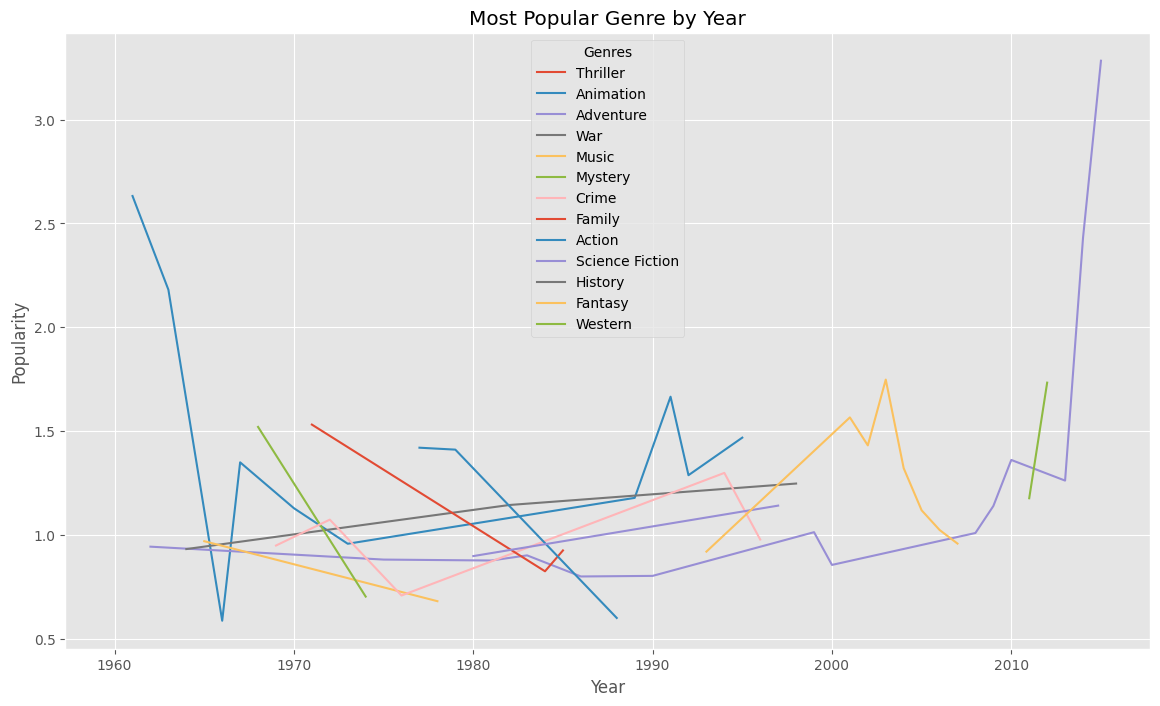

In [50]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('tmdb-movies.csv')

# Display the first few rows
df[['release_year', 'genres', 'popularity']].head()

# Split genres into individual entries
df_exploded = df.assign(genres=df['genres'].str.split('|')).explode('genres')

# Display the data after exploding to see the structure
df_exploded[['release_year', 'genres', 'popularity']].head()

# Group by 'release_year' and 'genres', then calculate the mean popularity for each genre per year
genre_popularity_by_year = df_exploded.groupby(['release_year', 'genres'])['popularity'].mean().reset_index()

# Display the top few rows of the result to check
genre_popularity_by_year.head()

# For each year, find the genre with the highest average popularity
most_popular_genres_each_year = genre_popularity_by_year.loc[
    genre_popularity_by_year.groupby('release_year')['popularity'].idxmax()
]

# Display the results to check the most popular genre for each year
most_popular_genres_each_year[['release_year', 'genres', 'popularity']]

# Plotting the trend of most popular genre each year
plt.figure(figsize=(14, 8))

# Loop through each unique genre and plot the popularity trend
for genre in most_popular_genres_each_year['genres'].unique():
    yearly_trend = most_popular_genres_each_year[most_popular_genres_each_year['genres'] == genre]
    # Ensure each plot line has a label corresponding to the genre
    plt.plot(yearly_trend['release_year'], yearly_trend['popularity'], label=genre)

# Set title and labels
plt.title('Most Popular Genre by Year')
plt.xlabel('Year')
plt.ylabel('Popularity')

# Add legend with title
plt.legend(title="Genres")
plt.show()

### Research Question 2  
> What factors are associated with high movie revenue?  
Purpose: Identify factors such as genre, director, or budget that influence high movie revenue.  
Dependent Variable: revenue_adj (revenue adjusted for inflation).  
Independent Variables: budget_adj (budget adjusted for inflation), genres (movie genre), director (director).  
Analysis: Investigate the relationship between budget, director, and genre with revenue to identify factors contributing to financial success.

Revenue (adjusted) statistics:
count    1.086600e+04
mean     5.136436e+07
std      1.446325e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.369710e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64


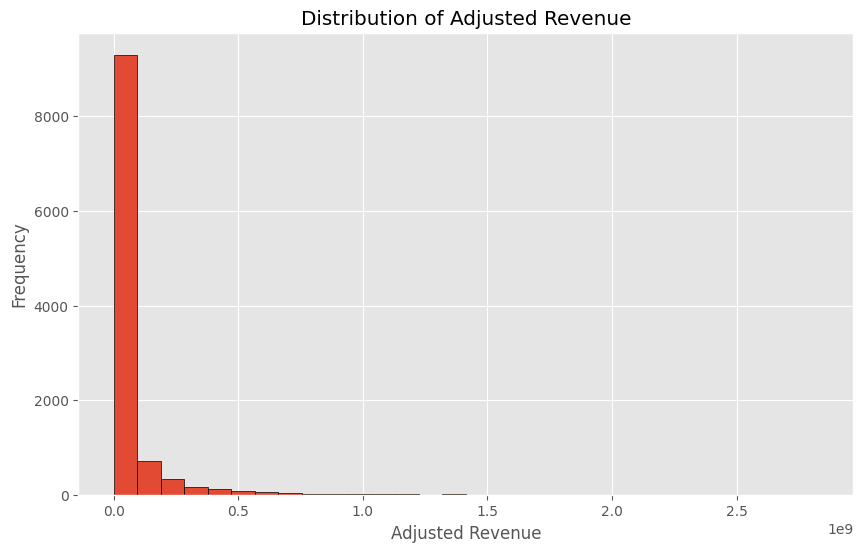

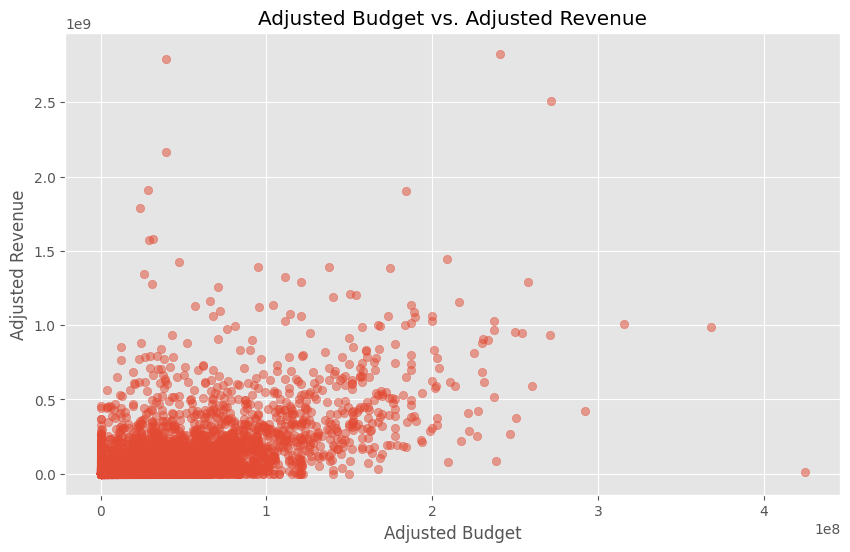

Correlation between adjusted budget and adjusted revenue: 0.6466074410608954
Average adjusted revenue by genre:
            genres   revenue_adj
0        Adventure  1.416752e+08
1          Fantasy  1.112342e+08
2           Action  9.172020e+07
3           Family  8.773671e+07
4  Science Fiction  8.690849e+07


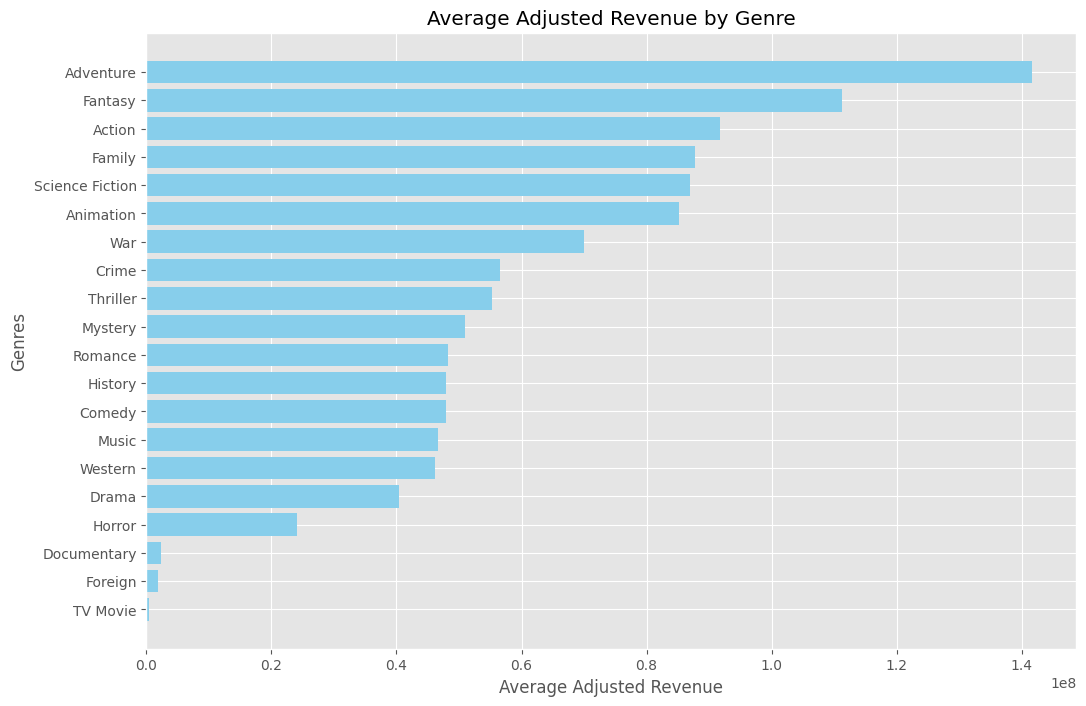

Top 10 directors by average adjusted revenue:
                                            director   revenue_adj
0  Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman  1.574815e+09
1                           Roger Allers|Rob Minkoff  1.159592e+09
2                           Kyle Balda|Pierre Coffin  1.064192e+09
3                                        Lee Unkrich  1.063172e+09
4          Andrew Adamson|Kelly Asbury|Conrad Vernon  1.061904e+09
5                                       George Lucas  1.052320e+09
6                         Andrew Stanton|Lee Unkrich  1.024887e+09
7                             Chris Miller|Raman Hui  8.402392e+08
8                                        David Yates  8.354911e+08
9                                        Pete Docter  7.854116e+08


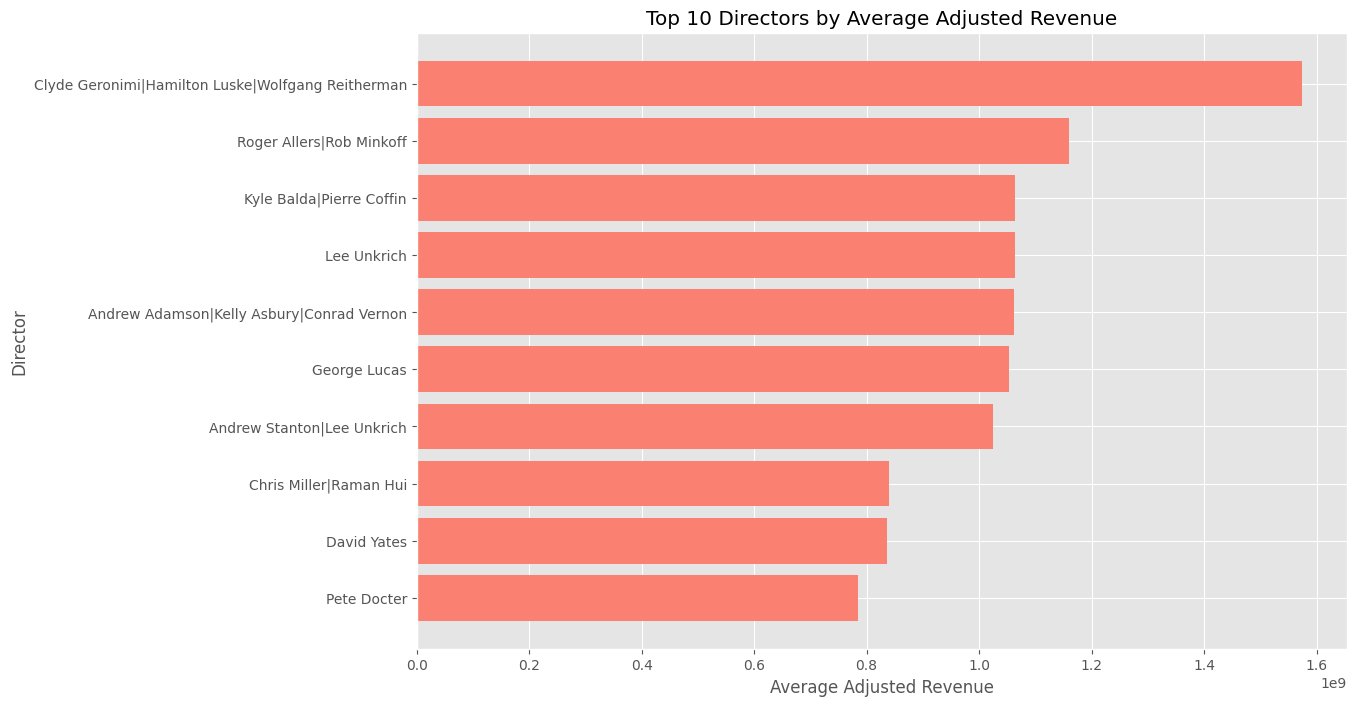

In [51]:
# Load the dataset
df = pd.read_csv('tmdb-movies.csv')

# Display the first few rows
df[['revenue_adj', 'budget_adj', 'genres', 'director']].head()

# Summary statistics for revenue_adj to understand its distribution
print("Revenue (adjusted) statistics:")
print(df['revenue_adj'].describe())

# Plot histogram to visualize the distribution of revenue
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['revenue_adj'].dropna(), bins=30, edgecolor='k')
plt.title("Distribution of Adjusted Revenue")
plt.xlabel("Adjusted Revenue")
plt.ylabel("Frequency")
plt.show()

# Scatter plot to analyze the relationship between budget and revenue
plt.figure(figsize=(10, 6))
plt.scatter(df['budget_adj'], df['revenue_adj'], alpha=0.5)
plt.title("Adjusted Budget vs. Adjusted Revenue")
plt.xlabel("Adjusted Budget")
plt.ylabel("Adjusted Revenue")
plt.show()

# Calculate the correlation between budget and revenue to quantify the relationship
budget_revenue_corr = df[['budget_adj', 'revenue_adj']].corr().iloc[0, 1]
print("Correlation between adjusted budget and adjusted revenue:", budget_revenue_corr)

# Similar to Question 1, we will explode genres to analyze each genre individually
df_exploded = df.assign(genres=df['genres'].str.split('|')).explode('genres')

# Group by genres and calculate the mean revenue for each genre
genre_revenue = df_exploded.groupby('genres')['revenue_adj'].mean().sort_values(ascending=False).reset_index()

# Display the top genres by average adjusted revenue
print("Average adjusted revenue by genre:")
print(genre_revenue.head())

# Bar plot to visualize average revenue by genre
plt.figure(figsize=(12, 8))
plt.barh(genre_revenue['genres'], genre_revenue['revenue_adj'], color='skyblue')
plt.title("Average Adjusted Revenue by Genre")
plt.xlabel("Average Adjusted Revenue")
plt.ylabel("Genres")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Group by director and calculate the mean revenue for each director
director_revenue = df.groupby('director')['revenue_adj'].mean().sort_values(ascending=False).head(10).reset_index()

# Display the top directors by average adjusted revenue
print("Top 10 directors by average adjusted revenue:")
print(director_revenue)

# Bar plot to visualize average revenue by top directors
plt.figure(figsize=(12, 8))
plt.barh(director_revenue['director'], director_revenue['revenue_adj'], color='salmon')
plt.title("Top 10 Directors by Average Adjusted Revenue")
plt.xlabel("Average Adjusted Revenue")
plt.ylabel("Director")
plt.gca().invert_yaxis()
plt.show()

<a id='conclusions'></a>
## Conclusions

### Summary of Findings
In this analysis, we explored two main questions:  
1. **Which genres are the most popular each year, and how has genre popularity shifted over time?**

- Our findings show that genres like Action, Drama, and Comedy have consistently remained popular across many years. However, the popularity of some genres fluctuated, reflecting changes in audience preferences over time.
- Visualizations suggested that genre popularity is dynamic and changes each year, likely due to cultural or societal shifts influencing audience tastes.

2. **What factors are linked to high movie revenue?**

- We observed a positive correlation between budget and revenue, indicating that movies with higher budgets tend to generate higher revenue. It is essential to note, however, that this is a correlation, not causation.
- Moreover, genres like Adventure and Sci-Fi were associated with higher average revenue. Certain directors also repeatedly produced high-revenue movies, suggesting that both genre and director may influence a movie's financial success.


### Limitations and Future Research
- **Data Limitations**: This dataset has some limitations, such as missing values in crucial columns like `genres` and `director`, requiring us to either impute or exclude these data points. Additionally, some data may be outdated, as it does not cover recent movie releases.
- **Scope of Analysis**: We focused solely on popularity and adjusted revenue as indicators of success. Other factors like audience demographics, marketing efforts, and global market trends, which may significantly impact a movie’s performance, were not considered.
- **Correlation vs. Causation**: AWhile we identified correlations, especially between budget and revenue, these do not imply causation. External factors could also impact revenue, and further research is needed to confirm these relationships.

For future research, analyzing data from more recent releases, including marketing expenses and audience demographics, would be valuable. Additionally, applying statistical tests and advanced machine learning models could help uncover the factors that truly drive a movie's financial success.


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should see output that starts with `NbConvertApp] Converting notebook`, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb